SVM Kernels

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5.0,5.0,100)
y= np.sqrt(10**2 - x**2)

y= np.hstack([y,-y])
x= np.hstack([x,-x])


In [5]:
x1=np.linspace(-5.0,5.0,100)
y1= np.sqrt(5**2 - x1**2)
y1= np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])




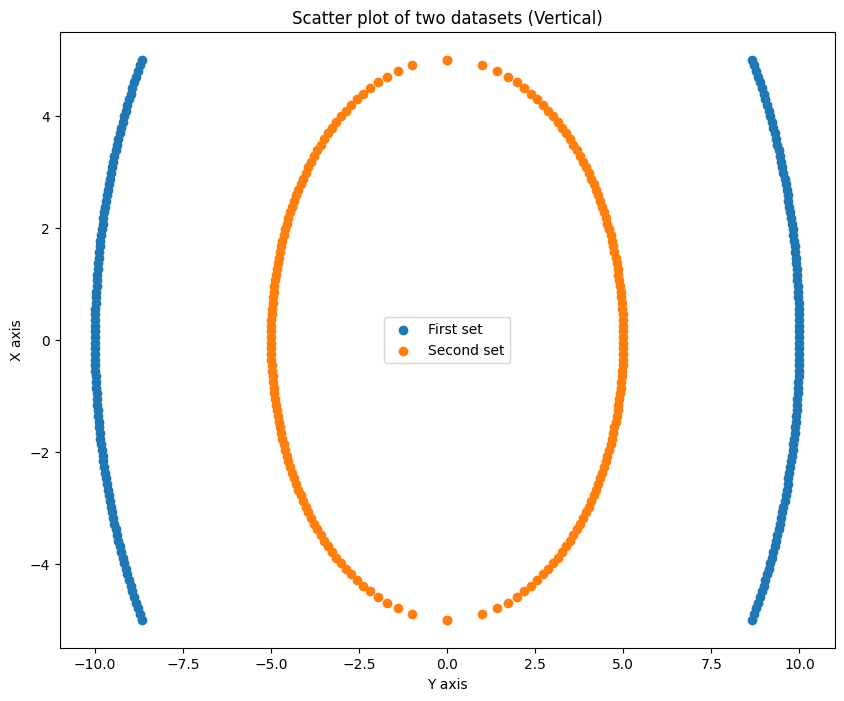

In [12]:
# Ensure x and y have the same length
min_length = min(len(x), len(y))
x = x[:min_length]
y = y[:min_length]

# Do the same for x1 and y1
min_length1 = min(len(x1), len(y1))
x1 = x1[:min_length1]
y1 = y1[:min_length1]

# Now plot with x and y swapped
plt.figure(figsize=(10, 8))
plt.scatter(y, x, label='First set')  # Swapped y and x
plt.scatter(y1, x1, label='Second set')  # Swapped y1 and x1
plt.xlabel('Y axis')  # Changed to Y axis
plt.ylabel('X axis')  # Changed to X axis
plt.title('Scatter plot of two datasets (Vertical)')
plt.legend()
plt.show()

In [17]:
import pandas as pd
import numpy as np

# Create df1
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1','X2'])
df1['Y'] = 0

# Create df2 with correct column names
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1','X2'])  # Changed from ['X2','X2'] to ['X1','X2']
df2['Y'] = 1

# Concatenate the dataframes
df = pd.concat([df1,df2], ignore_index=True)

# Display the first 5 rows
print(df.head(5))


         X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0


In [19]:
## dependent and independent variables

X= df.iloc[:,:-1]
y= df.Y

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [25]:
##ploynomial kernel

df['X1_Square']= df.X1**2
df['X2_Square']= df.X2**2
df['X1*X2']= df.X1*df.X2
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [26]:
X= df[['X1','X2','X1_Square', 'X2_Square', 'X1*X2']]
y= df.Y


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.head()

,X1,X2,X1_Square,X2_Square,X1*X2
247,4.993619,-0.252525,24.936231,0.063769,-1.261015
110,-9.169553,3.989899,84.080706,15.919294,-36.585591
16,9.410082,-3.383838,88.549638,11.450362,-31.842196
66,9.860133,1.666667,97.222222,2.777778,16.433555
153,-9.993749,-0.353535,99.875013,0.124987,3.533143


In [37]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1_Square', color='Y')
fig.show(renderer='browser')  # This will open the plot in your default browser